A_05_Gouri_Katre

A_59_Shreyash_Dhengekar


Mini Project:

Aim: The aim of this project is to identify the most accurate machine learning model for classifying cancer data, focusing on algorithms capable of distinguishing between benign and malignant tumors. By testing various classification models, this project seeks to select the model with the highest F1 Score, thereby maximizing prediction performance

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving Cancer_Data.csv to Cancer_Data (1).csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv('Cancer_Data.csv')

In [ ]:
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [ ]:
data.drop("id",axis=1,inplace=True)
# Drop columns with 'Unnamed' in their names
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [ ]:
mapping={'M':1,'B':0}
data["diagnosis"]=data["diagnosis"].map(mapping)


In [ ]:
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

model.fit(X_train, y_train)


GaussianNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, classification_report


def evaluate_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return accuracy, f1, recall


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

# Store the models and their names
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}


results = {}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    accuracy, f1, recall = evaluate_model(model, X_train, y_train, X_test, y_test)
    results[model_name] = {"Accuracy": accuracy, "F1 Score": f1, "Recall": recall}



Evaluating Logistic Regression...

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Evaluating Naive Bayes...

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Evaluating K-Nearest Neighbors...

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        71
           1       1.00      0.88      0.94        43

    accura

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
import pandas as pd
results_df = pd.DataFrame(results).T

print("\nSummary Report:\n", results_df)



Summary Report:
                      Accuracy  F1 Score    Recall
Logistic Regression  0.956140  0.955801  0.956140
Naive Bayes          0.973684  0.973481  0.973684
K-Nearest Neighbors  0.956140  0.955533  0.956140
Random Forest        0.964912  0.964738  0.964912


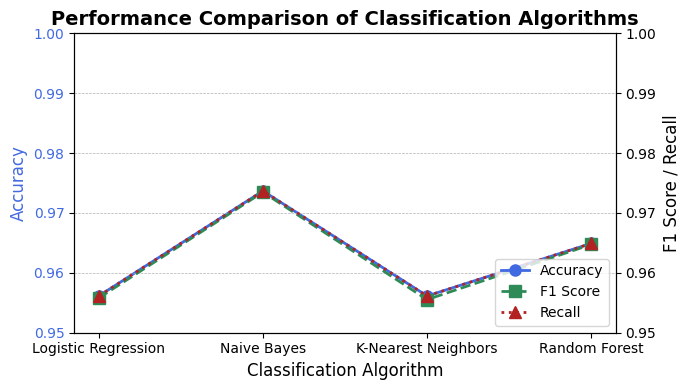

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data (replace with actual data if available)
data = {
    "Algorithm": ["Logistic Regression", "Naive Bayes", "K-Nearest Neighbors", "Random Forest"],
    "Accuracy": [0.956140, 0.973684, 0.956140, 0.964912],
    "F1 Score": [0.955801, 0.973481, 0.955533, 0.964738],
    "Recall": [0.956140, 0.973684, 0.956140, 0.964912]
}

# Convert data into a DataFrame
results_df = pd.DataFrame(data).set_index("Algorithm")

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(7, 4))

# Plot Accuracy on the first y-axis
ax1.plot(results_df.index, results_df["Accuracy"], color="royalblue", marker='o', markersize=8, linewidth=2, label="Accuracy")
ax1.set_xlabel("Classification Algorithm", fontsize=12)
ax1.set_ylabel("Accuracy", color="royalblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="royalblue")
ax1.set_ylim(0.95, 1.0)  # Adjust y-axis range for better visual separation

# Create a second y-axis to plot F1 Score and Recall
ax2 = ax1.twinx()
ax2.plot(results_df.index, results_df["F1 Score"], color="seagreen", marker='s', linestyle="--", markersize=8, linewidth=2, label="F1 Score")
ax2.plot(results_df.index, results_df["Recall"], color="firebrick", marker='^', linestyle=":", markersize=8, linewidth=2, label="Recall")
ax2.set_ylabel("F1 Score / Recall", color="black", fontsize=12)
ax2.tick_params(axis="y", labelcolor="black")
ax2.set_ylim(0.95, 1.0)

# Add legends for each y-axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="lower right", fontsize=10)

plt.title("Performance Comparison of Classification Algorithms", fontsize=14, fontweight='bold')
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [ ]:
best_model = results_df.sort_values(by="F1 Score", ascending=False).iloc[0]
print("\nBest Model Based on F1 Score:\n\n", best_model)



Best Model Based on F1 Score:

 Accuracy    0.973684
F1 Score    0.973481
Recall      0.973684
Name: Naive Bayes, dtype: float64


Conclusion:

Based on the analysis and model comparison, the Naive Bayes classifier was selected as the best-performing model. Its high F1 Score makes it a suitable choice for accurately classifying tumors, which is essential in a healthcare setting where predictive accuracy significantly impacts patient outcomes. This model's balance between precision and recall demonstrates its reliability in minimizing both false positives and false negatives, thus enhancing diagnostic reliability.